# IS 445 - Final Project: City of Rockford Crime Offenses Analysis

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import seaborn as sns
import traitlets
import palettable
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('cm_offense_archive.csv')
data['Occurred Date'] = data['Occurred Date'].astype(str).str[:-4].astype(np.int64)
data

,CaseNo,Description,Occurred Date,Occurred Day of Week,Occurred Time,X,Y,Crime Against Code,Crime Against,Group,Beat,Ward
0,16-009615,90C - Disorderly Conduct,2016,1,1006,-89.124354,42.284104,NaN,NaN,NaN,NaN,7.0
1,16-014351,90C - Disorderly Conduct,2016,5,1906,-89.070417,42.254735,NaN,NaN,NaN,NaN,11.0
2,16-016247,13B - Simple Assault,2016,2,1550,-89.042083,42.238147,NaN,NaN,NaN,NaN,8.0
3,16-016181,290 - Destruction/Damage/Vandalism of Property,2016,3,1138,-89.029085,42.241433,NaN,NaN,NaN,NaN,14.0
4,16-023111,23H - All Other Larceny,2016,6,100,-89.029201,42.211097,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200617,20-084708,200 - Arson,2020,0,109,-89.070647,42.253152,PR,PROPERTY,A,RP06,11.0
200618,20-084477,23F - Theft From Motor Vehicle,2020,6,1420,-89.053822,42.260884,PR,PROPERTY,A,RP09,10.0
200619,20-084777,290 - Destruction/Damage/Vandalism of Property,2020,6,1300,-89.053850,42.264499,PR,PROPERTY,A,RP09,10.0
200620,20-084777,23F - Theft From Motor Vehicle,2020,6,1300,-89.053850,42.264499,PR,PROPERTY,A,RP09,10.0


<AxesSubplot:xlabel='Occurred Day of Week', ylabel='counts'>

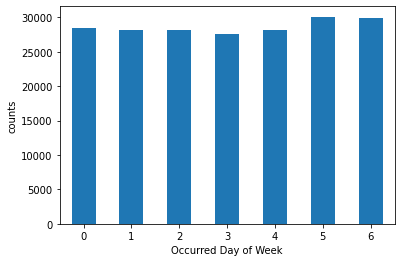

In [4]:
Occurred_Each_day = data['Occurred Day of Week'].value_counts().sort_index()
plt = Occurred_Each_day.plot(kind='bar',rot=0)
plt.set_xlabel('Occurred Day of Week')
plt.set_ylabel('counts')
plt

In [5]:
data.columns

Index(['CaseNo', 'Description', 'Occurred Date', 'Occurred Day of Week',
       'Occurred Time', 'X', 'Y', 'Crime Against Code', 'Crime Against',
       'Group', 'Beat', 'Ward'],
      dtype='object')

In [6]:
def scatter(x, y, color_scaling, colormap='Blues'):
    pyplot.figure(figsize=(10, 10), dpi=70)
    pyplot.scatter(data[x], data[y], c=(data[color_scaling]), cmap=colormap)
    pyplot.show()

In [7]:
interact(scatter, x=['X'],
            y=['Y'],
            color_scaling=['Occurred Day of Week'],
            colormap=pyplot.colormaps())

interactive(children=(Dropdown(description='x', options=('X',), value='X'), Dropdown(description='y', options=…

<function __main__.scatter(x, y, color_scaling, colormap='Blues')>

In [8]:
def number_of_occurrences(Day):
    filtered_data = data[(data['Occurred Day of Week']==Day)]
    Occurred_Each_year = filtered_data['Occurred Date'].value_counts().sort_index()
    plt2 = Occurred_Each_year.plot(kind='line',rot=0)
    plt2.set_xlabel('Year')
    plt2.set_ylabel('counts')
    plt2
interact(number_of_occurrences, Day = (0,6))

interactive(children=(IntSlider(value=3, description='Day', max=6), Output()), _dom_classes=('widget-interact'…

<function __main__.number_of_occurrences(Day)>

<AxesSubplot:xlabel='Year', ylabel='counts'>

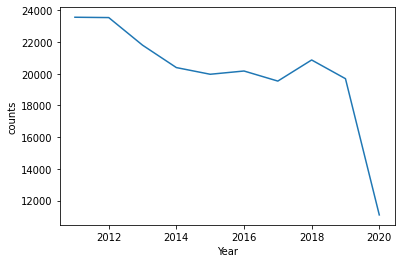

In [9]:
Occurred_Each_year = data['Occurred Date'].value_counts().sort_index()
plt3 = Occurred_Each_year.plot(kind='line',rot=0)
plt3.set_xlabel('Year')
plt3.set_ylabel('counts')
plt3

In [10]:
states_crime = pd.read_csv('estimated_crimes_1979_2019.csv')
states_crime[['state_abbr']] = states_crime[['state_abbr']].fillna(value='United States')
states_crime

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
0,2011,United States,NaN,311587816,1206031,14661,84175.0,NaN,354772,752423,9052743,2185140,6151095,716508
1,2011,AK,Alaska,723860,4416,30,436.0,NaN,576,3374,19094,2852,14854,1388
2,2011,AL,Alabama,4803689,20166,299,1370.0,NaN,4906,13591,173192,51119,111411,10662
3,2011,AR,Arkansas,2938582,14173,160,1230.0,NaN,2357,10426,110430,34016,70645,5769
4,2011,AZ,Arizona,6467315,26789,397,2499.0,NaN,7145,16748,229896,54695,155400,19801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2019,WA,Washington,7614893,22377,198,NaN,3332.0,5147,13700,204224,34540,145282,24402
464,2019,WI,Wisconsin,5822434,17070,175,NaN,2261.0,2991,11643,85672,12667,65620,7385
465,2019,WV,West Virginia,1792147,5674,78,NaN,754.0,378,4464,28376,5891,20066,2419
466,2019,WY,Wyoming,578759,1258,13,NaN,324.0,67,854,9093,1396,6984,713


Dropdown(description='State name', index=32, options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'F…

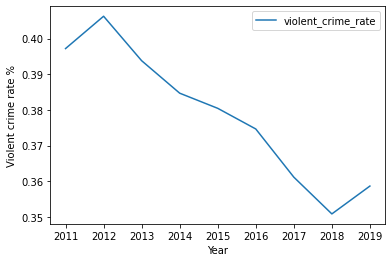

In [11]:
from IPython.display import display, clear_output
def violent_crime_rate(value):
    state_crime = states_crime.loc[states_crime['state_abbr']== value]
    state_crime['violent_crime_rate'] = state_crime['violent_crime']/state_crime['population']*100
    plt4 = state_crime.plot.line(x='year', y='violent_crime_rate')
    plt4.set_xlabel('Year')
    plt4.set_ylabel('Violent crime rate %')
    plt4
    
default = 'United States'
violent_crime_rate(default)

w = widgets.Dropdown(
    options=["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY","United States"],
    value = default,
    description='State name',
)

display(w)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w)
        violent_crime_rate(change['new'])

w.observe(on_change)

### Citations

1. City of Rockford Crime Offenses 2011-Present. https://data.illinois.gov/dataset/116city_of_rockford_crime_offenses_2011present<br>
2. Summary (SRS) Data with Estimated Crimes. http://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/estimated_crimes_1979_2019.csv